In [7]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
btc=pd.read_csv('Bitcoin.csv')

In [4]:
btc.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [8]:
a='2015-5-6'
datetime.strptime(a,'%Y-%m-%d')

datetime.datetime(2015, 5, 6, 0, 0)

In [9]:
btc.Date=pd.Series([datetime.strptime(a,'%Y-%m-%d') for a in btc.Date])

In [12]:
btc.Date.head()


0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: Date, dtype: datetime64[ns]

Text(0, 0.5, 'Shares in millions')

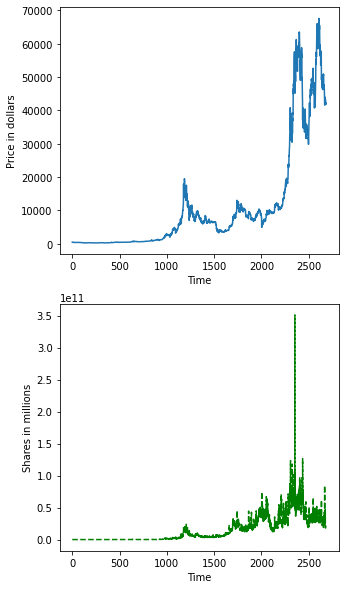

In [151]:
import time
btc['posix']=pd.Series(time.mktime(d.timetuple()) for d in btc.Date )
figure,(ax1,ax2)=plt.subplots(2,1,figsize=(5,10))
ax1.plot(btc.Close)
ax1.set_xlabel("Time")
ax2.plot(btc.Volume,'g--')
ax2.set_xlabel("Time")
ax1.set_ylabel("Price in dollars")
ax2.set_ylabel("Shares in millions")


In [115]:
from sklearn.model_selection import train_test_split
n_train=2600
X=btc.posix.values.reshape(-1,1)
y=btc.Close.values

xtr,xte=X[:n],X[n:]
ytr,yte=y[:n],y[n:]

from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=100)
reg.fit(xtr,ytr)

y_pred=reg.predict(xte)
y_pred_train=reg.predict(xtr)

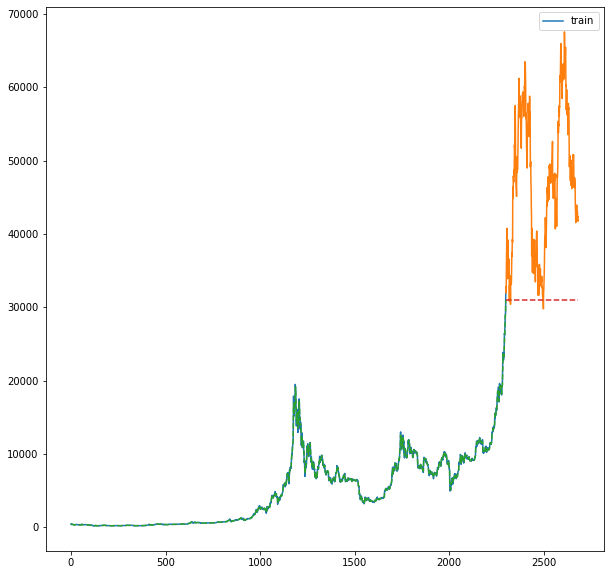

In [116]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
# plt.xticks(range(0,len(X),8),xticks.strftime("a"))
plt.plot(range(n),ytr,label="train")
plt.plot(range(n,len(yte)+n),yte,'-')
plt.plot(range(n),y_pred_train,'--')
plt.plot(range(n,len(yte)+n),y_pred,'--')
plt.legend(loc='best')

In [168]:
X_vol=btc.Volume.values.reshape(-1,1)
roll=btc.Close.rolling(250).mean()

In [171]:
#lets write a helper function

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(30, 10))
#     plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="prediction test")
    plt.plot(roll,label="moving average for a window of size 250")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Dates")
    plt.ylabel("Price")

Test-set R^2: -1.47


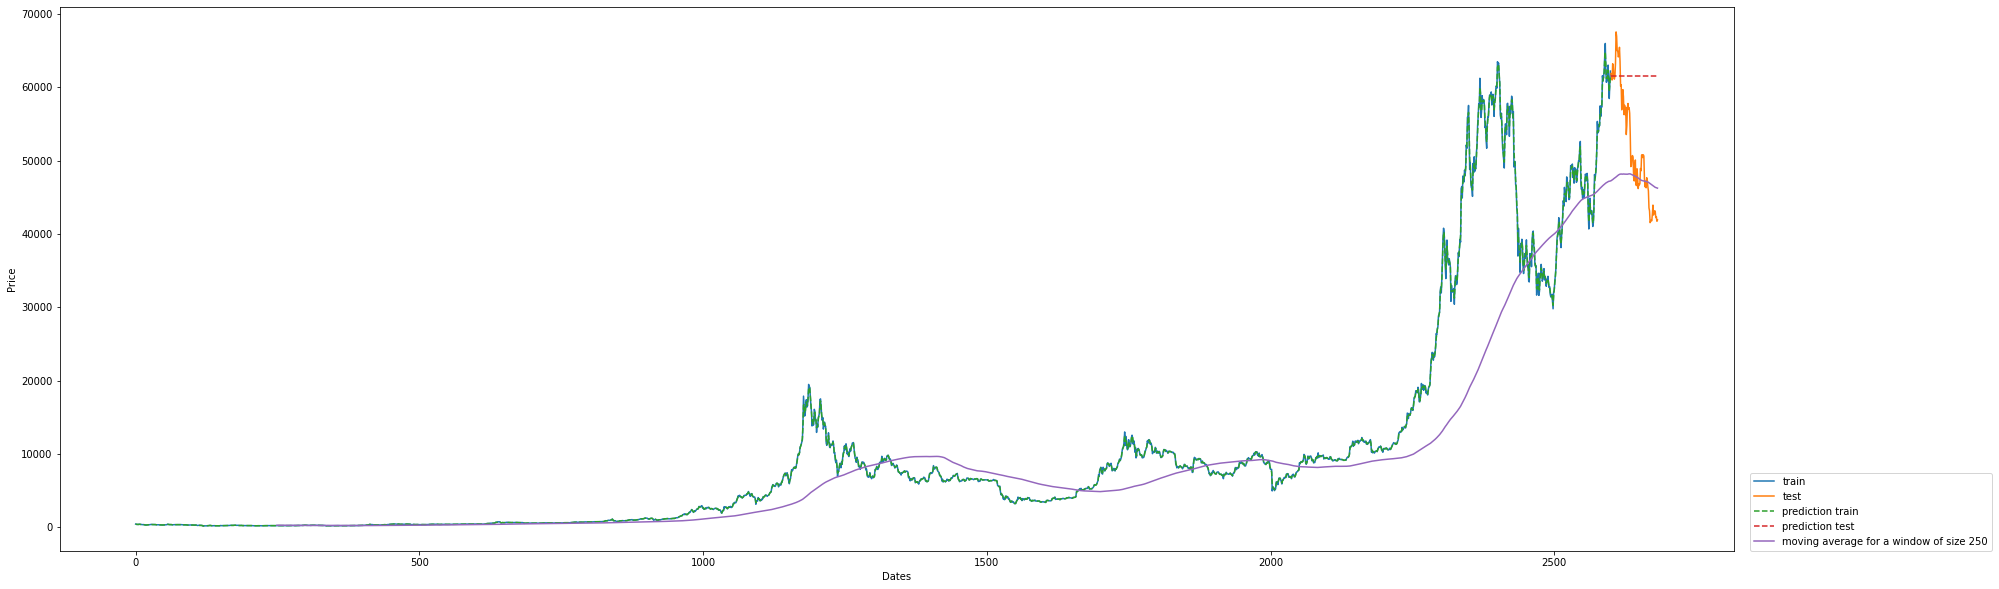

In [172]:


X=btc.posix.values.reshape(-1,1)
y=btc.Close.values
xticks=pd.date_range(start=btc.Date.min(),end=btc.Date.max())
eval_on_features(X,y,reg)

In [173]:
X_o=btc.Open.values.reshape(-1,1)
X_v=btc.Volume.values.reshape(-1,1)

Test-set R^2: 0.94
Test-set R^2: -18.34


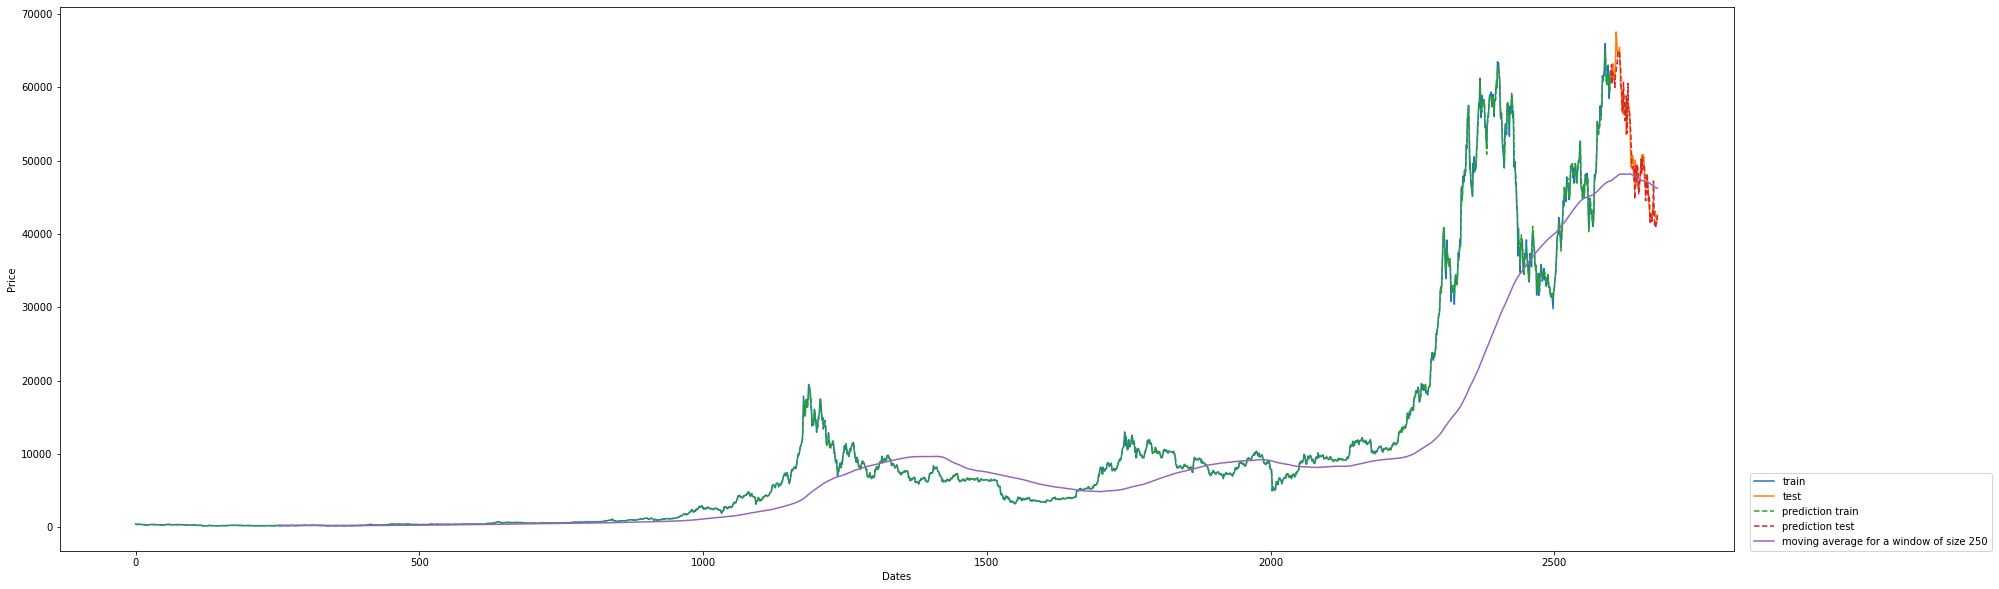

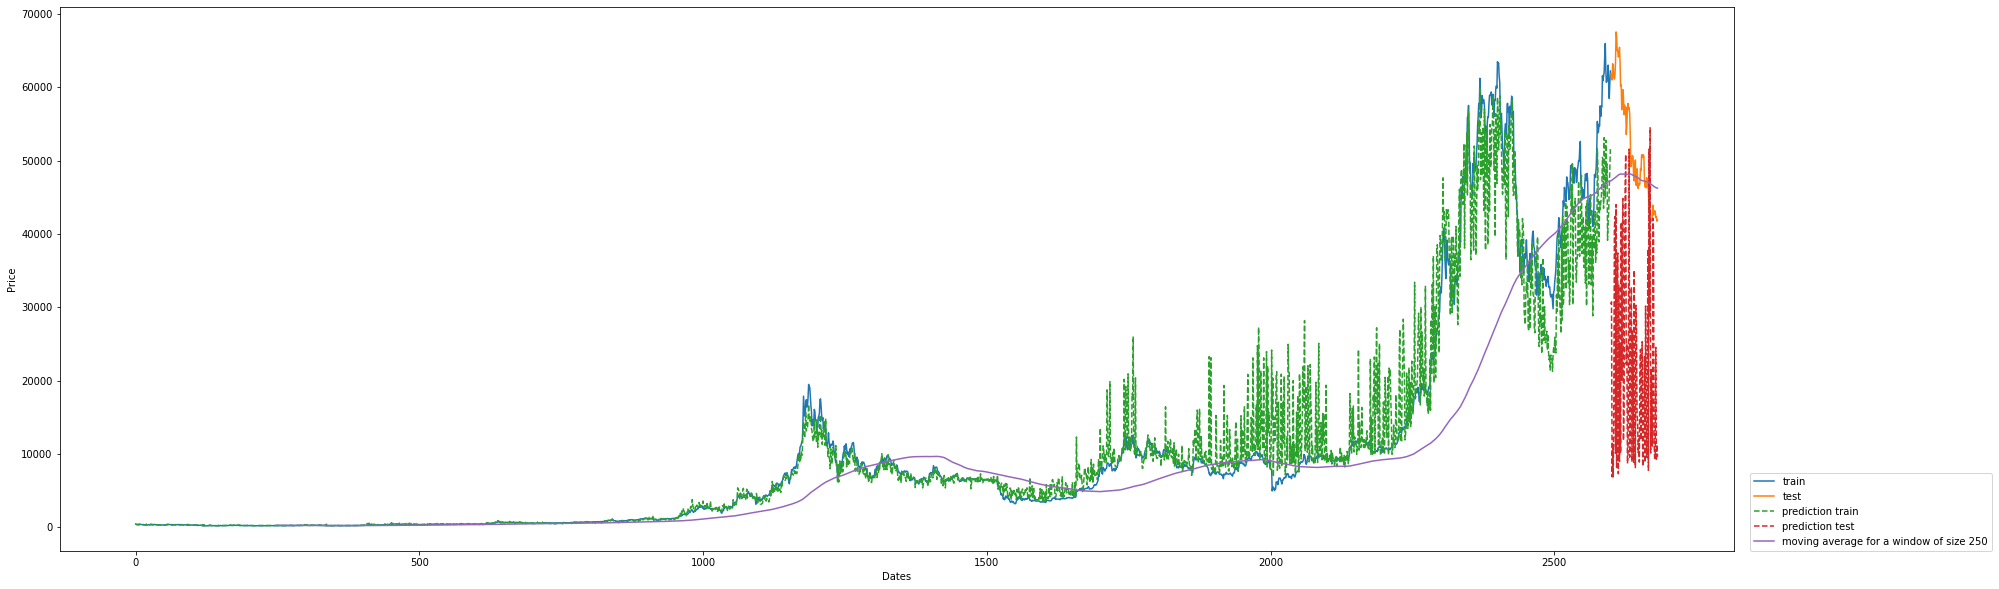

In [174]:
eval_on_features(X_o,y,reg)
eval_on_features(X_v,y,reg)

In [175]:
X_O_V=np.hstack([X_o,X_v])

Test-set R^2: 0.94


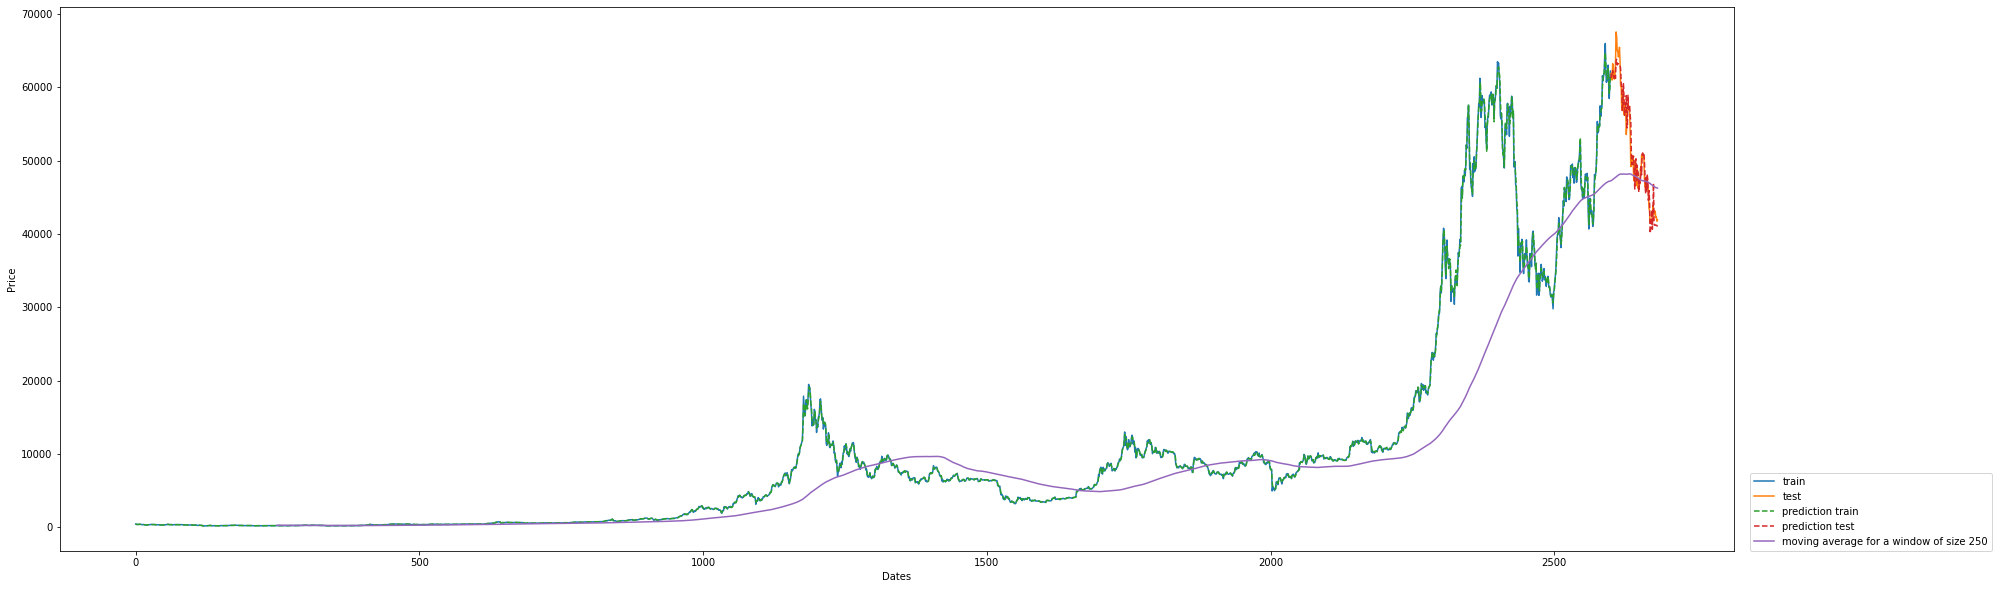

In [176]:
eval_on_features(X_O_V,y,reg)

<AxesSubplot:>

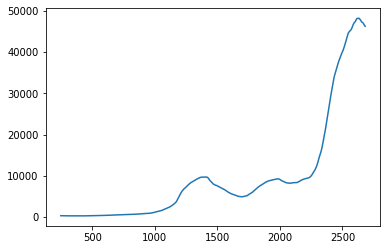

In [177]:
btc.Close.rolling(250).mean().plot()